# Esemble 1001-001

`Labrador Coast Domain`

#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.path as mpath
import matplotlib.cm as cm
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import cartopy.mpl.gridliner as gridliner
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="All-NaN slice encountered")
%matplotlib inline
import time

In [2]:
start_time=time.time()

path='/Users/thomas/Downloads/Research/Data Analysis'
ds=xr.open_mfdataset(path+'/esemble 1001-001/*.nc')



end_time=time.time()
elapsed_time = end_time - start_time
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)

print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

Execution time:  0.0 hours, 0.0 minutes, 15.861587047576904 seconds


### Sea Ice Extent

In [3]:
ds

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, time: 3012, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time         (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (time, nc) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    VGRDi        (time, nkice) float32 dask.array<chunksize=(120, 8), meta=np.ndarray>
    VGRDs        (time, nksnow) float32 dask.array<chunksize=(120, 3), meta=np.ndarray>
    VGRDb        (time, nkbio) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    tmask        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    tarea        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    ...           ...
    lont_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latt_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    lonu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    time_bounds  (time, d2) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    aice         (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 18500201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2020-01-31 at 16:34
    io_flavor:         io_pio

In [4]:
aice=ds['aice']
tarea=ds['tarea']

In [5]:
# Define the Labrador coast boundaries (replace these with your desired region)
#lat_min, lat_max = 50, 70
#lon_min, lon_max =295, 305 #65W & 55W

#lon_min, lon_max =292, 315 #68W & 45W
#lat_min, lat_max =51,67

lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69


#lon_min, lon_max =295, 305 #68W & 45W
#lat_min, lat_max =50,61
# Create a mask for Labrador coast 
mask = ((aice.TLAT >= lat_min) & (aice.TLAT <= lat_max) &
        (aice.TLON >= lon_min) & (aice.TLON <= lon_max))

mask2 = ((tarea.TLAT >= lat_min) & (tarea.TLAT <= lat_max) &
        (tarea.TLON >= lon_min) & (tarea.TLON <= lon_max))

# Apply the mask to the aice variable
aice__region =aice.where(mask, drop=True)
tarea_region=tarea.where(mask2, drop=True)

In [6]:
aice__region

<xarray.DataArray 'aice' (time: 3012, nj: 50, ni: 38)>
dask.array<where, shape=(3012, 50, 38), dtype=float32, chunksize=(120, 50, 38), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(50, 38), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(50, 38), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(50, 38), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(50, 38), meta=np.ndarray>
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [7]:
sic_greater_15 = xr.where(aice__region >= 0.15, 1, 0)
aice_region = (sic_greater_15 * tarea_region)/1e12

In [6]:
#aice_region=((aice_region.where(aice_region>=0.15))*tarea_region)/1e12
#aice_region =((aice__region.where(aice__region >=0.15))*tarea_region)/1e12
#aice_region=aice_region.fillna(0)
#aice_region=aice_region.where(aice_region>0,0)

In [8]:
aice__region[0, 31:51, 10].values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.99349827, 0.99622893, 0.99535656,        nan,
              nan,        nan,        nan,        nan], dtype=float32)

In [9]:
aice_region[0, 31:51, 10].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.001565  , 0.00151326, 0.00146075,        nan,
              nan,        nan,        nan,        nan])

In [8]:
aice_1850_59=aice_region.sel(time=slice('1850-01-01','1859-12-31'))
aice_1860_69=aice_region.sel(time=slice('1860-01-01','1869-12-31'))
aice_1870_79=aice_region.sel(time=slice('1870-01-01','1879-12-31'))
aice_1880_89=aice_region.sel(time=slice('1880-01-01','1889-12-31'))
aice_1890_99=aice_region.sel(time=slice('1890-01-01','1899-12-31'))
aice_1900_09=aice_region.sel(time=slice('1900-01-01','1909-12-31'))
aice_1910_19=aice_region.sel(time=slice('1910-01-01','1919-12-31'))
aice_1920_29=aice_region.sel(time=slice('1920-01-01','1929-12-31'))
aice_1930_39=aice_region.sel(time=slice('1930-01-01','1939-12-31'))
aice_1940_49=aice_region.sel(time=slice('1940-01-01','1949-12-31'))
aice_1950_59=aice_region.sel(time=slice('1950-01-01','1959-12-31'))
aice_1960_69=aice_region.sel(time=slice('1960-01-01','1969-12-31'))
aice_1970_79=aice_region.sel(time=slice('1970-01-01','1979-12-31'))
aice_1980_89=aice_region.sel(time=slice('1980-01-01','1989-12-31'))
aice_1990_99=aice_region.sel(time=slice('1990-01-01','1999-12-31'))
aice_2000_09=aice_region.sel(time=slice('2000-01-01','2009-12-31'))
aice_2010_19=aice_region.sel(time=slice('2010-01-01','2019-12-31'))


aice_2020_29=aice_region.sel(time=slice('2020-01-01','2029-12-31'))
aice_2030_39=aice_region.sel(time=slice('2030-01-01','2039-12-31'))
aice_2040_49=aice_region.sel(time=slice('2040-01-01','2049-12-31'))
aice_2050_59=aice_region.sel(time=slice('2050-01-01','2059-12-31'))
aice_2060_69=aice_region.sel(time=slice('2060-01-01','2069-12-31'))
aice_2070_79=aice_region.sel(time=slice('2070-01-01','2079-12-31'))
aice_2080_89=aice_region.sel(time=slice('2080-01-01','2089-12-31'))
aice_2090_100=aice_region.sel(time=slice('2090-01-01','2100-12-31'))

In [9]:
# Monthly mean hist
aice_1850_59_monthly = aice_1850_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1860_69_monthly = aice_1860_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1870_79_monthly = aice_1870_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1880_89_monthly = aice_1880_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1890_99_monthly = aice_1890_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1900_09_monthly = aice_1900_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1910_19_monthly = aice_1910_19.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1920_29_monthly = aice_1920_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1930_39_monthly = aice_1930_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1940_49_monthly = aice_1940_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1950_59_monthly = aice_1950_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1960_69_monthly = aice_1960_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1970_79_monthly = aice_1970_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1980_89_monthly = aice_1980_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_1990_99_monthly = aice_1990_99.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2000_09_monthly = aice_2000_09.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2010_19_monthly = aice_2010_19.groupby('time.month').mean('time').sum(('nj','ni'))

# Monthly mean future
aice_2020_29_monthly = aice_2020_29.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2030_39_monthly = aice_2030_39.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2040_49_monthly = aice_2040_49.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2050_59_monthly = aice_2050_59.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2060_69_monthly = aice_2060_69.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2070_79_monthly = aice_2070_79.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2080_89_monthly = aice_2080_89.groupby('time.month').mean('time').sum(('nj','ni'))
aice_2090_100_monthly = aice_2090_100.groupby('time.month').mean('time').sum(('nj','ni'))


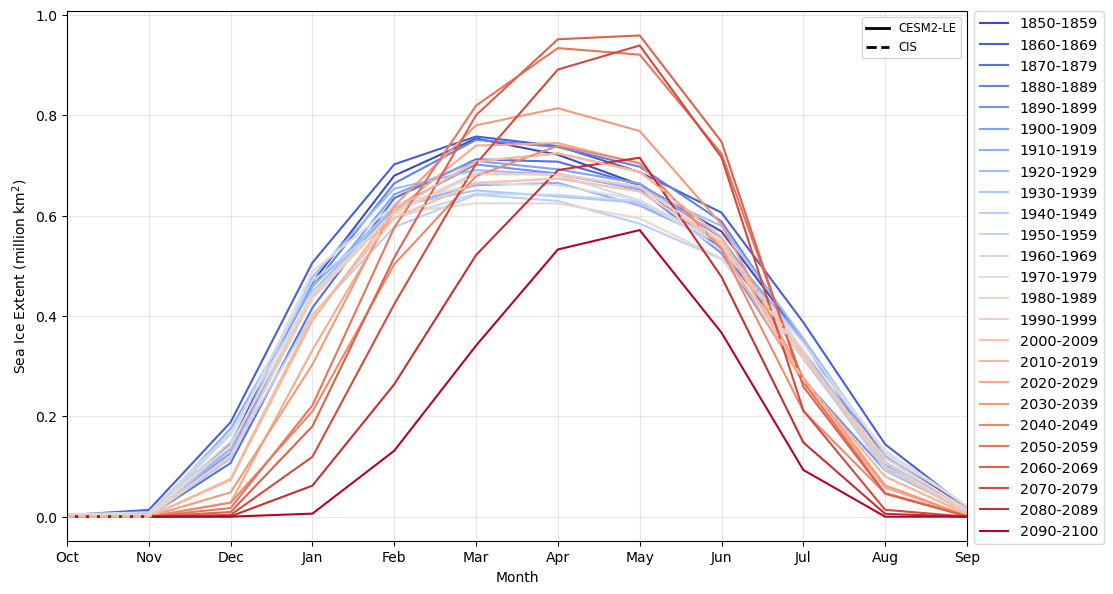

In [10]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [aice_1850_59_monthly,aice_1860_69_monthly,aice_1870_79_monthly,aice_1880_89_monthly,aice_1890_99_monthly,
            aice_1900_09_monthly,aice_1910_19_monthly,aice_1920_29_monthly,aice_1930_39_monthly,aice_1940_49_monthly,
            aice_1950_59_monthly,aice_1960_69_monthly,aice_1970_79_monthly,aice_1980_89_monthly,aice_1990_99_monthly,
            aice_2000_09_monthly,aice_2010_19_monthly,aice_2020_29_monthly,aice_2030_39_monthly,aice_2040_49_monthly,
            aice_2050_59_monthly,aice_2060_69_monthly,aice_2070_79_monthly,aice_2080_89_monthly,aice_2090_100_monthly]

all_data1= [aice_1990_99_monthly,aice_2000_09_monthly,aice_2010_19_monthly]

labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

'''
colors = ['blue', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'black', 'maroon', 
          'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'lime', 'gold',
          'indigo', 'pink', 'olive','violet', 'green', 'red',  'brown', 'orange', 'teal']
          
cmap_colors = [blue_color]
for i in range(1, 25):
    # Calculate the intermediate color
    alpha = i / 24  # Interpolation factor between blue and red
    color = [(1 - alpha) * blue_color[0] + alpha * red_color[0],
             (1 - alpha) * blue_color[1] + alpha * red_color[1],
             (1 - alpha) * blue_color[2] + alpha * red_color[2]]
    cmap_colors.append(color)

# Create the colormap
cmap = plt.cm.colors.ListedColormap(cmap_colors)

cmap = plt.cm.get_cmap('coolwarm', 25)
'''

cmap = plt.cm.get_cmap('coolwarm', 25)
cmap2=[cmap(14), cmap(15), cmap(16)]

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
             label=labels[i])

for i in range(len(all_data1)):
    linestyle = '--'  # Default linestyle
    ax.plot((np.append(all_data1[i][9:],all_data1[i][:9])), color=cmap2[i], linestyle=linestyle)
    
legend1 = ax.legend(loc='best',fontsize=10.3, bbox_to_anchor=(1.0, 1.014))

# Add the legend manually to the current Axes.
ax.add_artist(legend1)
namedatas=['CESM2-LE','CIS']
xdatas = [1, 1]
ydatas = [0.2, 0.15]
color = ['k', 'k']
linestyles = ['-', '--']
linewidths = [2, 2]

for x, y, name, c, ls, lw in zip(xdatas, ydatas, namedatas, color, linestyles, linewidths):
    ax.plot(x, y, color=c, linestyle=ls, linewidth=lw, label=name)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[len(all_data):], labels[len(all_data):], fontsize='small',loc='upper right')


plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Extent (million km$^2$)')
#plt.title('Seasonal Cycle of Sea Ice Extent \n(EM 1001-001)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
#plt.legend(loc='best',fontsize=9.5, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('season-area1.jpg',dpi=300, bbox_inches='tight')

plt.show()

#panarctic 

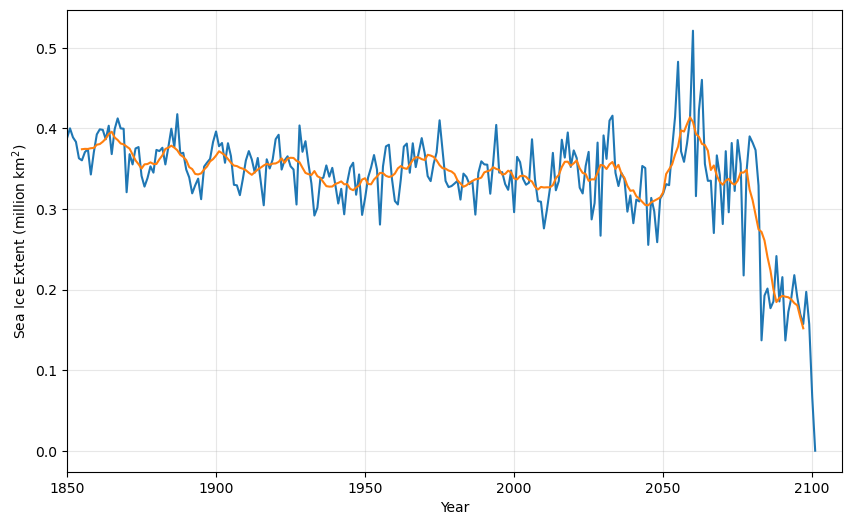

In [11]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice area
yearly_max = aice_region.groupby('time.year').mean('time').sum(('nj', 'ni'))
# Calculate the mean across all yearsa
#erall_mean = yearly_max.mean('year')
#print(overall_mean)
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_max, overall_mean)
# Plot the yearly variations and the mean line
ax.plot(yearly_max.year, yearly_max)
#plt.plot(yearly_max.year, mean_line,linestyle='--', color='black')
ax.plot(yearly_max.year, yearly_max.rolling(year=10, center=True).mean())
#rect=ax.add_patch(Rectangle((2048, 0.036), 25, 0.083, edgecolor='red',facecolor='none',lw=2,))
#rect.set_zorder(10)
plt.xlabel('Year')
#plt.title('Yearly Mean Sea Ice Extent \n(EM 1001-001)', fontweight='bold')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.xlim(1850,2110)
plt.grid(alpha=0.3)
#plt.savefig(path+'/plots/'+'plot2.jpg',dpi=300, bbox_inches='tight')
plt.show()

#### April

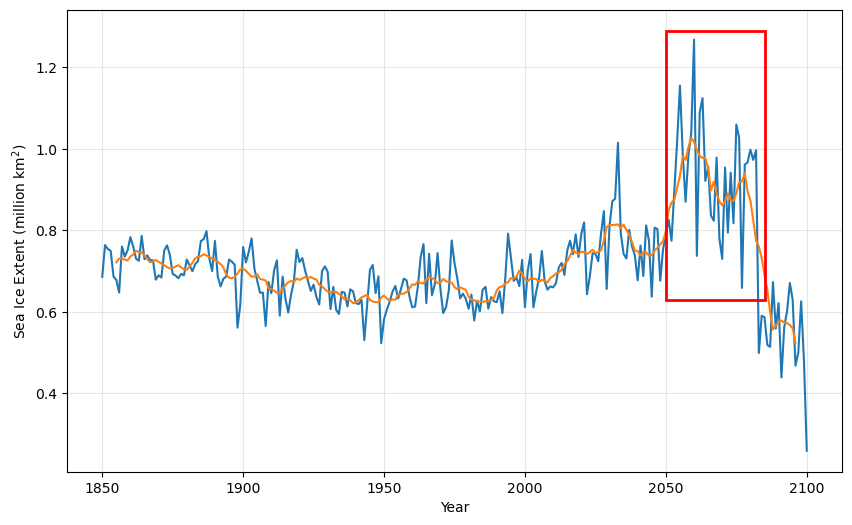

In [13]:
fig, ax=plt.subplots(figsize=(10,6))

april_aice = aice_region[2::12].sum(('nj', 'ni'))
#may_aice = aice_region[3::12].sum(('nj', 'ni'))

ax.plot(np.arange(1850,2101),april_aice)
#ax.plot(np.arange(1850,2101),may_aice)
ax.plot(np.arange(1850,2101),april_aice.rolling(time=10, center=True).mean())

rect=ax.add_patch(Rectangle((2050, 0.63), 35, 0.66, edgecolor='red',facecolor='none',lw=2,))
rect.set_zorder(10)
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
#plt.savefig(path+'/plots/'+'plot2-april.jpg',dpi=300, bbox_inches='tight')
plt.show()

#### May

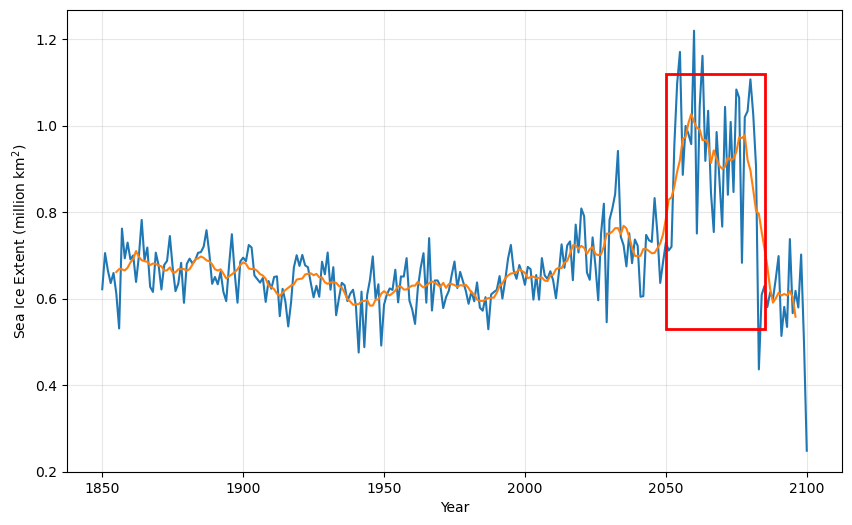

In [12]:
fig, ax=plt.subplots(figsize=(10,6))

#april_aice = aice_region[2::12].sum(('nj', 'ni'))
may_aice = aice_region[3::12].sum(('nj', 'ni'))

#ax.plot(np.arange(1850,2101),april_aice)
ax.plot(np.arange(1850,2101),may_aice)
ax.plot(np.arange(1850,2101),may_aice.rolling(time=10, center=True).mean())

rect=ax.add_patch(Rectangle((2050, 0.53), 35, 0.59, edgecolor='red',facecolor='none',lw=2,))
rect.set_zorder(10)
plt.xlabel('Year')
plt.ylabel('Sea Ice Extent (million km$^2$)')
plt.grid(alpha=0.3)
#plt.savefig(path+'/plots/'+'plot2.jpg',dpi=300, bbox_inches='tight')
plt.show()

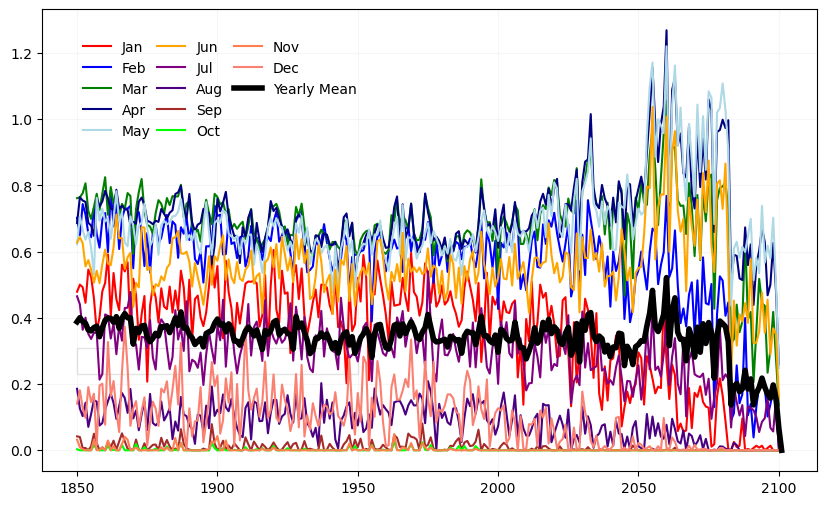

In [15]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice area
#yearly_mean = aice_region.groupby('time.year').mean('time')
yearly_mean = aice_region.groupby('time.year').mean('time').sum(('nj', 'ni'))
jan_data=aice_region[11::12].sum(('nj', 'ni'))
feb_data=aice_region[0::12].sum(('nj', 'ni'))
mar_data=aice_region[1::12].sum(('nj', 'ni'))
apr_data=aice_region[2::12].sum(('nj', 'ni'))
may_data=aice_region[3::12].sum(('nj', 'ni'))
jun_data=aice_region[4::12].sum(('nj', 'ni'))
jul_data=aice_region[5::12].sum(('nj', 'ni'))
aug_data=aice_region[6::12].sum(('nj', 'ni'))
sep_data=aice_region[7::12].sum(('nj', 'ni'))
oct_data=aice_region[8::12].sum(('nj', 'ni'))
nov_data=aice_region[9::12].sum(('nj', 'ni'))
dec_data=aice_region[10::12].sum(('nj', 'ni'))

# Calculate the mean across all years
#overall_mean = yearly_mean.mean('year')
#print(overall_mean)
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line

ax.plot(np.arange(1850,2101), jan_data, label='Jan', color='red')
ax.plot(np.arange(1850,2101), feb_data, label='Feb', color='blue')
ax.plot(np.arange(1850,2101), mar_data, label='Mar', color='green')
ax.plot(np.arange(1850,2101), apr_data, label='Apr', color='navy')
ax.plot(np.arange(1850,2101), may_data, label='May', color='lightblue')
ax.plot(np.arange(1850,2101), jun_data, label='Jun', color='orange')
ax.plot(np.arange(1850,2101), jul_data, label='Jul', color='purple')
ax.plot(np.arange(1850,2101), aug_data, label='Aug', color='indigo')
ax.plot(np.arange(1850,2101), sep_data, label='Sep', color='brown')
ax.plot(np.arange(1850,2101), oct_data, label='Oct', color='lime')
ax.plot(np.arange(1850,2101), nov_data, label='Nov', color='coral')
ax.plot(np.arange(1850,2101), dec_data, label='Dec', color='Salmon')
ax.plot(np.arange(1850,2102), yearly_mean, label='Yearly Mean', color='black', linewidth=4)
rect=ax.add_patch(Rectangle((1850, 0.23), 100, 0.08, edgecolor='k',facecolor='None',alpha=0.11,lw=1, ))
#rect.set_zorder(10)
#plt.xticks(np.arange(1850,2100))
plt.grid(alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
legend1=plt.legend(handles[:5],labels[:5],loc='upper left',bbox_to_anchor=(0.037, 0.96),frameon=False)
legend2=plt.legend(handles[5:10],labels[5:10],loc='upper left',bbox_to_anchor=(0.133, 0.96),frameon=False)
legend3=plt.legend(handles[10:],labels[10:],loc='upper left',bbox_to_anchor=(0.232, 0.96),frameon=False)


# Add the first legend manually to the current Axes
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.savefig('year-area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

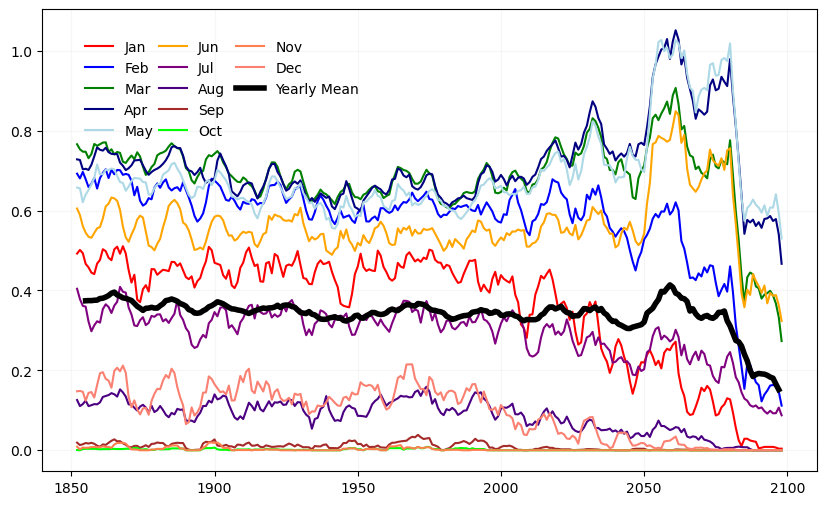

In [16]:
fig, ax=plt.subplots(figsize=(10,6))
# Compute the yearly mean ice area
#yearly_mean = aice_region.groupby('time.year').mean('time')
yearly_mean = aice_region.groupby('time.year').mean('time').sum(('nj', 'ni'))
jan_data=aice_region[11::12].sum(('nj', 'ni'))
feb_data=aice_region[0::12].sum(('nj', 'ni'))
mar_data=aice_region[1::12].sum(('nj', 'ni'))
apr_data=aice_region[2::12].sum(('nj', 'ni'))
may_data=aice_region[3::12].sum(('nj', 'ni'))
jun_data=aice_region[4::12].sum(('nj', 'ni'))
jul_data=aice_region[5::12].sum(('nj', 'ni'))
aug_data=aice_region[6::12].sum(('nj', 'ni'))
sep_data=aice_region[7::12].sum(('nj', 'ni'))
oct_data=aice_region[8::12].sum(('nj', 'ni'))
nov_data=aice_region[9::12].sum(('nj', 'ni'))
dec_data=aice_region[10::12].sum(('nj', 'ni'))

# Calculate the mean across all years
#overall_mean = yearly_mean.mean('year')
#print(overall_mean)
# Create an array with the same size as the number of years with the overall mean value
#mean_line = np.full_like(yearly_mean, overall_mean)
# Plot the yearly variations and the mean line


ax.plot(np.arange(1850,2101), jan_data.rolling(time=5, center=True).mean(), label='Jan', color='red')
ax.plot(np.arange(1850,2101), feb_data.rolling(time=5, center=True).mean(), label='Feb', color='blue')
ax.plot(np.arange(1850,2101), mar_data.rolling(time=5, center=True).mean(), label='Mar', color='green')
ax.plot(np.arange(1850,2101), apr_data.rolling(time=5, center=True).mean(), label='Apr', color='navy')
ax.plot(np.arange(1850,2101), may_data.rolling(time=5, center=True).mean(), label='May', color='lightblue')
ax.plot(np.arange(1850,2101), jun_data.rolling(time=5, center=True).mean(), label='Jun', color='orange')
ax.plot(np.arange(1850,2101), jul_data.rolling(time=5, center=True).mean(), label='Jul', color='purple')
ax.plot(np.arange(1850,2101), aug_data.rolling(time=5, center=True).mean(), label='Aug', color='indigo')
ax.plot(np.arange(1850,2101), sep_data.rolling(time=5, center=True).mean(), label='Sep', color='brown')
ax.plot(np.arange(1850,2101), oct_data.rolling(time=5, center=True).mean(), label='Oct', color='lime')
ax.plot(np.arange(1850,2101), nov_data.rolling(time=5, center=True).mean(), label='Nov', color='coral')
ax.plot(np.arange(1850,2101), dec_data.rolling(time=5, center=True).mean(), label='Dec', color='Salmon')
ax.plot(np.arange(1850,2102), yearly_mean.rolling(year=10,center=True).mean(),label='Yearly Mean',color='black',
        linewidth=4)
#rect=ax.add_patch(Rectangle((1850, 0.23), 100, 0.08, edgecolor='k',facecolor='None',alpha=0.11,lw=1, ))
#rect.set_zorder(10)
#plt.xticks(np.arange(1850,2100))
plt.grid(alpha=0.1)
handles, labels = plt.gca().get_legend_handles_labels()

# Create two legends
legend1=plt.legend(handles[:5],labels[:5],loc='upper left',bbox_to_anchor=(0.04, 0.96),frameon=False)
legend2=plt.legend(handles[5:10],labels[5:10],loc='upper left',bbox_to_anchor=(0.135, 0.96),frameon=False)
legend3=plt.legend(handles[10:],labels[10:],loc='upper left',bbox_to_anchor=(0.235, 0.96),frameon=False)


# Add the first legend manually to the current Axes
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

#plt.savefig('year-area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

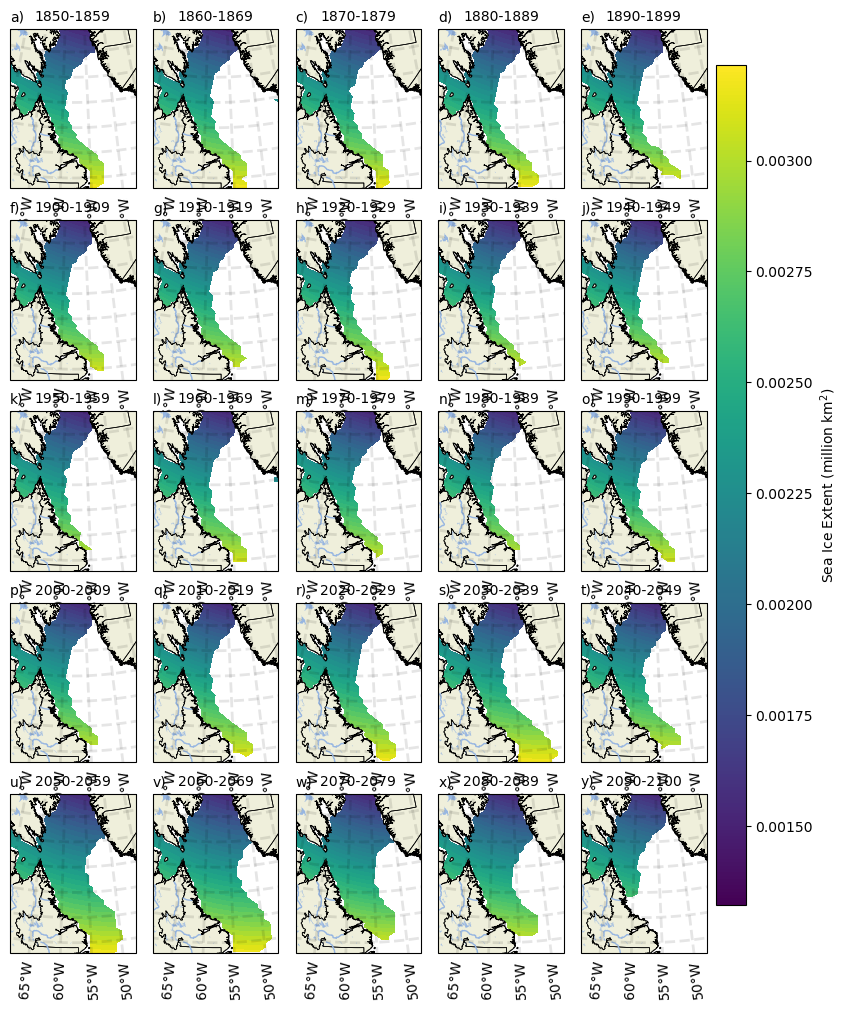

Execution time:  0.0 hours, 1.0 minutes, 29.48956799507141 seconds


In [17]:
#=================mean=========================
start_time=time.time()

fig = plt.figure(figsize=(10,12))

selected_data = [aice_1850_59, aice_1860_69, aice_1870_79, aice_1880_89, aice_1890_99, aice_1900_09, aice_1910_19,
                 aice_1920_29, aice_1930_39, aice_1940_49, aice_1950_59, aice_1960_69, aice_1970_79, aice_1980_89,
                 aice_1990_99, aice_2000_09, aice_2010_19, aice_2020_29, aice_2030_39, aice_2040_49, aice_2050_59,
                 aice_2060_69, aice_2070_79, aice_2080_89, aice_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

global_min = np.min([np.nanmin(data[3::12].where(aice__region > 0.15).mean('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data[3::12].where(aice__region > 0.15).mean('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=global_max)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, 
                    selected_data[i][2::12].where(aice__region > 0.15).mean('time'),
                    norm=norm,levels=45,transform=ccrs.PlateCarree())
        #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time')*100,
                    #colors='red', levels=[15], transform=ccrs.PlateCarree())
        
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, 
                    selected_data[i][3::12].where(aice__region > 0.15).mean('time'),
                    norm=norm,levels=45,transform=ccrs.PlateCarree())
        
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = True, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
                
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('Sea Ice Extent (million km$^2$)', fontsize=10)

plt.subplots_adjust(wspace=-0.3)

plt.savefig('april_spat_area1.jpg',dpi=300, bbox_inches='tight')
plt.show()

end_time=time.time()
elapsed_time = end_time - start_time
# Convert seconds to hours, minutes, seconds
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
print("Execution time: ", hours, "hours,", minutes, "minutes,", seconds, "seconds")

### Sea Ice Concentration

In [23]:
#sic_region=aice__region.where(sic_greater_15)
sic_region=aice__region


In [24]:
sic_1850_59=sic_region.sel(time=slice('1850-01-01','1859-12-31'))
sic_1860_69=sic_region.sel(time=slice('1860-01-01','1869-12-31'))
sic_1870_79=sic_region.sel(time=slice('1870-01-01','1879-12-31'))
sic_1880_89=sic_region.sel(time=slice('1880-01-01','1889-12-31'))
sic_1890_99=sic_region.sel(time=slice('1890-01-01','1899-12-31'))
sic_1900_09=sic_region.sel(time=slice('1900-01-01','1909-12-31'))
sic_1910_19=sic_region.sel(time=slice('1910-01-01','1919-12-31'))
sic_1920_29=sic_region.sel(time=slice('1920-01-01','1929-12-31'))
sic_1930_39=sic_region.sel(time=slice('1930-01-01','1939-12-31'))
sic_1940_49=sic_region.sel(time=slice('1940-01-01','1949-12-31'))
sic_1950_59=sic_region.sel(time=slice('1950-01-01','1959-12-31'))
sic_1960_69=sic_region.sel(time=slice('1960-01-01','1969-12-31'))
sic_1970_79=sic_region.sel(time=slice('1970-01-01','1979-12-31'))
sic_1980_89=sic_region.sel(time=slice('1980-01-01','1989-12-31'))
sic_1990_99=sic_region.sel(time=slice('1990-01-01','1999-12-31'))
sic_2000_09=sic_region.sel(time=slice('2000-01-01','2009-12-31'))
sic_2010_19=sic_region.sel(time=slice('2010-01-01','2019-12-31'))

sic_2020_29=sic_region.sel(time=slice('2020-01-01','2029-12-31'))
sic_2030_39=sic_region.sel(time=slice('2030-01-01','2039-12-31'))
sic_2040_49=sic_region.sel(time=slice('2040-01-01','2049-12-31'))
sic_2050_59=sic_region.sel(time=slice('2050-01-01','2059-12-31'))
sic_2060_69=sic_region.sel(time=slice('2060-01-01','2069-12-31'))
sic_2070_79=sic_region.sel(time=slice('2070-01-01','2079-12-31'))
sic_2080_89=sic_region.sel(time=slice('2080-01-01','2089-12-31'))
sic_2090_100=sic_region.sel(time=slice('2090-01-01','2100-12-31'))

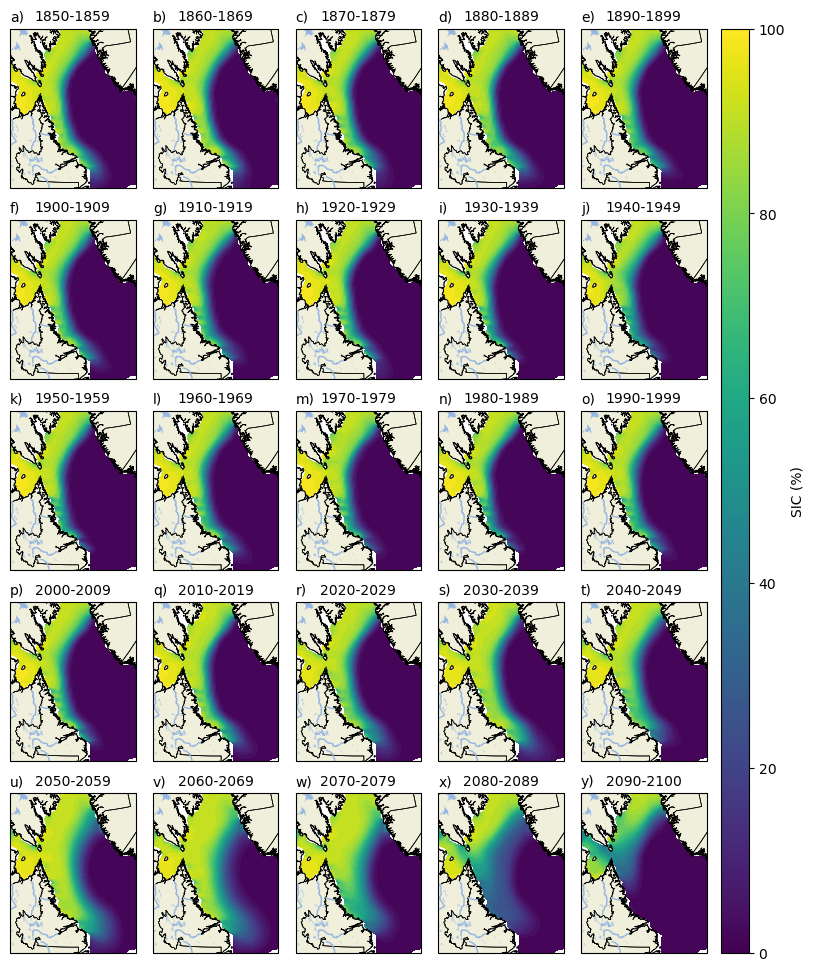

In [20]:
#=========sic_region==max=========================
# Create a figure with two subplots
fig = plt.figure(figsize=(10,12))
selected_data = [sic_1850_59, sic_1860_69, sic_1870_79, sic_1880_89, sic_1890_99, sic_1900_09, sic_1910_19,
                 sic_1920_29, sic_1930_39, sic_1940_49, sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89,
                 sic_1990_99, sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49, sic_2050_59,
                 sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

#global_min = np.min([np.min(data.max('time').values) for data in selected_data])
#global_max = np.max([np.max(data.max('time').values) for data in selected_data])
#norm = plt.Normalize(vmin=global_min, vmax=global_max)
#cb=cm.ScalarMappable(norm=norm)

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time')*100,
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time')*100,
                    #colors='red', levels=[15], transform=ccrs.PlateCarree())
        
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time')*100,
                norm=norm,levels=45, transform=ccrs.PlateCarree())
        #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time')*100,
                #colors='red',levels=[15], transform=ccrs.PlateCarree())
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.3)
#plt.tight_layout()
plt.savefig(path+'/plots/'+'plot3-April.jpg',dpi=300, bbox_inches='tight')
plt.show()


In [21]:
sic_months=sic_region.sel(time=slice('1990','2019')).groupby('time.month').mean('time')
#sic_months=sic_region.groupby('time.month').mean('time')

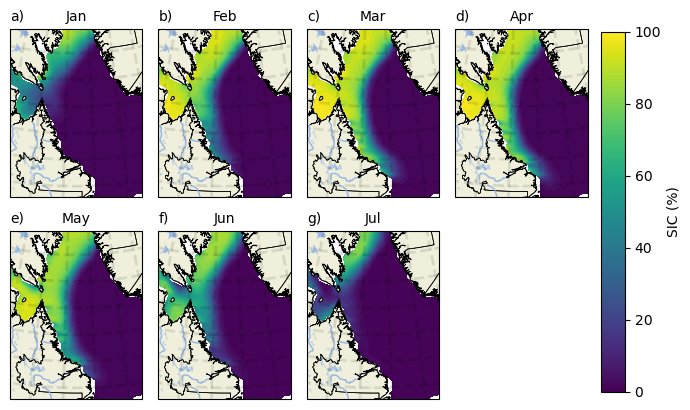

In [22]:
# Create a figure with two# Create a figure with two subplots
#fig = plt.figure(figsize=(6, 7.2))
fig = plt.figure(figsize=(8, 4.8))

selected_data=[sic_months[0],sic_months[1],sic_months[2],sic_months[3],sic_months[4],sic_months[5],
              sic_months[6]]
titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']
name=['a)','b)','c)','d)','e)','f)','g)','h)', 'i)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(2,4, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
cbar_ax = fig.add_axes([0.89, 0.125, 0.03, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
plt.savefig(path+'/plots/'+'plot4.jpg',dpi=300, bbox_inches='tight')
plt.show()

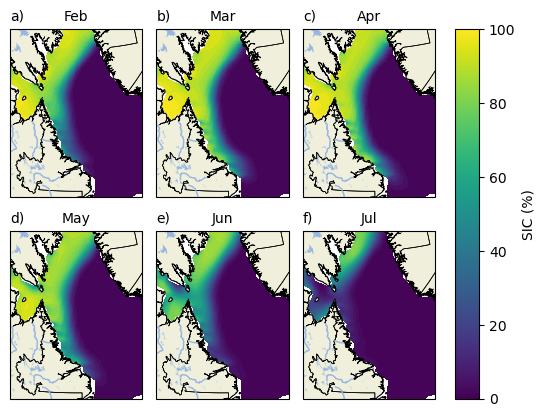

In [23]:
# Create a figure with two# Create a figure with two subplots
#fig = plt.figure(figsize=(6, 7.2))
fig = plt.figure(figsize=(6, 4.8))

selected_data=[sic_months[1],sic_months[2],sic_months[3],sic_months[4],sic_months[5],
              sic_months[6]]
titles = ['Feb','Mar','Apr','May','Jun','Jul','Aug']
name=['a)','b)','c)','d)','e)','f)','g)','h)', ]

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
plt.savefig(path+'/plots/'+'plot4-1.jpg',dpi=300, bbox_inches='tight')
plt.show()

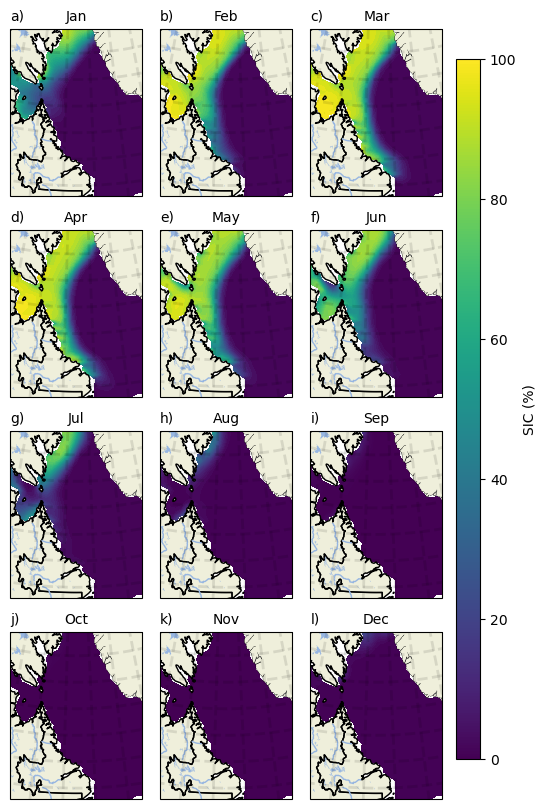

In [24]:
# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(8,10))

selected_data=[sic_months[0],sic_months[1],sic_months[2],sic_months[3],sic_months[4],sic_months[5],
              sic_months[6],sic_months[7],sic_months[8],sic_months[9],sic_months[10],sic_months[11]]
titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(4,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(linewidth=0.5)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.BORDERS,  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    
    
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',
                   #transform=ccrs.PlateCarree(), )
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

plt.subplots_adjust(wspace=-0.53)
#plt.savefig(path+'/plots/'+'plot4.jpg',dpi=300, bbox_inches='tight')
plt.show()

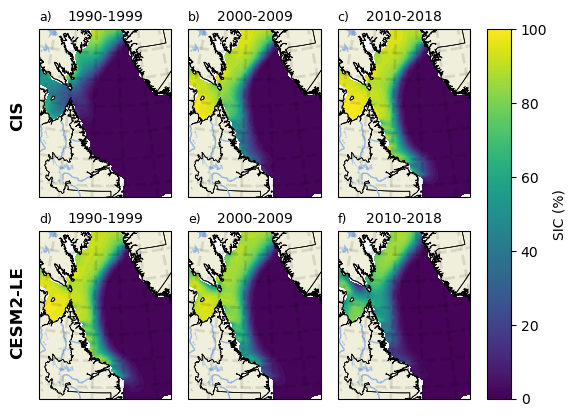

In [25]:
# Create a figure with two# Create a figure with two subplots
fig = plt.figure(figsize=(6,4.8))

selected_data=[sic_months[0],sic_months[1],sic_months[2],sic_months[3],sic_months[4],sic_months[5]]
titles=['1990-1999', '2000-2009','2010-2018','1990-1999', '2000-2009','2010-2018']
letter=['a)','b)','c)','d)','e)','f)']

norm = plt.Normalize(0, 100)
cb=cm.ScalarMappable(norm=norm)


x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
#for i in range(3):
    # Create a subplot with the PlateCarree projection
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,letter[i], transform=ax.transAxes, fontsize=9)
    
    
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=45, norm=norm,
                   transform=ccrs.PlateCarree())
    #ax.contour(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i]*100, levels=[15], colors='red',linewidth=3,
                   #transform=ccrs.PlateCarree())
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical',label='SIC (%)')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIC (%)', fontsize=10)  

name=['CIS', 'CESM2-LE']
x=[0.13,0.13]
y=[0.7,0.29]
for i in range (2):
    fig.text(x[i],y[i], name[i], fontweight='bold',va='bottom', ha='center', rotation='vertical',
             rotation_mode='anchor',fontsize=12)
plt.subplots_adjust(wspace=-0.1)
#plt.subplots_adjust(hspace=0.7)
#plt.savefig('max_spat_SICmon.jpg',dpi=300, bbox_inches='tight')
plt.show()

#### Sea Ice Thickness

In [13]:
dst=xr.open_mfdataset(path+'/icethick-esemble 1001-001/*.nc')

In [14]:
hi=dst['hi'] 

In [16]:
# Define the Labrador coast boundaries (replace these with your desired region)
#lat_min, lat_max = 50, 61
#lon_min, lon_max =295, 305 #65W & 55W
lon_min, lon_max =287, 315 #73W & 45W
lat_min, lat_max =51,69
# Create a mask for Labrador coast 
mask = ((hi.TLAT >= lat_min) & (hi.TLAT <= lat_max) &
        (hi.TLON >= lon_min) & (hi.TLON <= lon_max))

# Apply the mask to the aice variable
hi_region =hi.where(mask, drop=True)

In [41]:
#hi_region=hi_region.where(sic_greater_15)

In [17]:
hi_1850_59 = hi_region.sel(time=slice('1850-01-01', '1859-12-31'))
hi_1860_69 = hi_region.sel(time=slice('1860-01-01', '1869-12-31'))
hi_1870_79 = hi_region.sel(time=slice('1870-01-01', '1879-12-31'))
hi_1880_89 = hi_region.sel(time=slice('1880-01-01', '1889-12-31'))
hi_1890_99 = hi_region.sel(time=slice('1890-01-01', '1899-12-31'))
hi_1900_09 = hi_region.sel(time=slice('1900-01-01', '1909-12-31'))
hi_1910_19 = hi_region.sel(time=slice('1910-01-01', '1919-12-31'))
hi_1920_29 = hi_region.sel(time=slice('1920-01-01', '1929-12-31'))
hi_1930_39 = hi_region.sel(time=slice('1930-01-01', '1939-12-31'))
hi_1940_49 = hi_region.sel(time=slice('1940-01-01', '1949-12-31'))
hi_1950_59 = hi_region.sel(time=slice('1950-01-01', '1959-12-31'))
hi_1960_69 = hi_region.sel(time=slice('1960-01-01', '1969-12-31'))
hi_1970_79 = hi_region.sel(time=slice('1970-01-01', '1979-12-31'))
hi_1980_89 = hi_region.sel(time=slice('1980-01-01', '1989-12-31'))
hi_1990_99 = hi_region.sel(time=slice('1990-01-01', '1999-12-31'))
hi_2000_09 = hi_region.sel(time=slice('2000-01-01', '2009-12-31'))
hi_2010_19 = hi_region.sel(time=slice('2010-01-01', '2019-12-31'))

hi_2020_29 = hi_region.sel(time=slice('2020-01-01', '2029-12-31'))
hi_2030_39 = hi_region.sel(time=slice('2030-01-01', '2039-12-31'))
hi_2040_49 = hi_region.sel(time=slice('2040-01-01', '2049-12-31'))
hi_2050_59 = hi_region.sel(time=slice('2050-01-01', '2059-12-31'))
hi_2060_69 = hi_region.sel(time=slice('2060-01-01', '2069-12-31'))
hi_2070_79 = hi_region.sel(time=slice('2070-01-01', '2079-12-31'))
hi_2080_89 = hi_region.sel(time=slice('2080-01-01', '2089-12-31'))
hi_2090_100 = hi_region.sel(time=slice('2090-01-01', '2100-12-31'))

In [18]:
# Monthly mean hist
hi_1850_59_monthly = hi_1850_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1860_69_monthly = hi_1860_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1870_79_monthly = hi_1870_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1880_89_monthly = hi_1880_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1890_99_monthly = hi_1890_99.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1900_09_monthly = hi_1900_09.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1910_19_monthly = hi_1910_19.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1920_29_monthly = hi_1920_29.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1930_39_monthly = hi_1930_39.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1940_49_monthly = hi_1940_49.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1950_59_monthly = hi_1950_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1960_69_monthly = hi_1960_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1970_79_monthly = hi_1970_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1980_89_monthly = hi_1980_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_1990_99_monthly = hi_1990_99.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2000_09_monthly = hi_2000_09.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2010_19_monthly = hi_2010_19.groupby('time.month').mean('time').mean(('nj', 'ni'))

# Monthly mean future
hi_2020_29_monthly = hi_2020_29.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2030_39_monthly = hi_2030_39.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2040_49_monthly = hi_2040_49.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2050_59_monthly = hi_2050_59.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2060_69_monthly = hi_2060_69.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2070_79_monthly = hi_2070_79.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2080_89_monthly = hi_2080_89.groupby('time.month').mean('time').mean(('nj', 'ni'))
hi_2090_100_monthly = hi_2090_100.groupby('time.month').mean('time').mean(('nj', 'ni'))

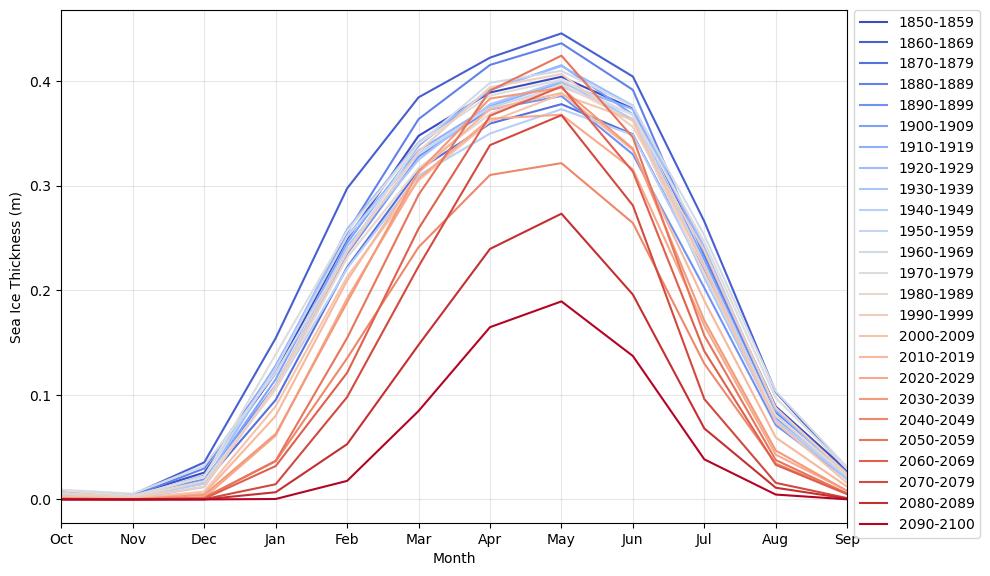

In [19]:
# Set xticks to represent months from January to December
fig,ax=plt.subplots(figsize=(10,6.05))
all_data = [hi_1850_59_monthly, hi_1860_69_monthly, hi_1870_79_monthly, hi_1880_89_monthly, hi_1890_99_monthly,
            hi_1900_09_monthly, hi_1910_19_monthly, hi_1920_29_monthly, hi_1930_39_monthly, hi_1940_49_monthly,
            hi_1950_59_monthly, hi_1960_69_monthly, hi_1970_79_monthly, hi_1980_89_monthly, hi_1990_99_monthly,
            hi_2000_09_monthly, hi_2010_19_monthly, hi_2020_29_monthly, hi_2030_39_monthly, hi_2040_49_monthly,
            hi_2050_59_monthly, hi_2060_69_monthly, hi_2070_79_monthly, hi_2080_89_monthly, hi_2090_100_monthly]


labels = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']

'''
cmap=['lime', 'darkgreen', 'salmon', 'cyan', 'magenta', 'yellow', 'coral', 'maroon', 
      'purple',  'navy', 'turquoise','beige', 'peachpuff', 'lightblue', 'red', 'green', 'blue',
      'gold', 'indigo', 'pink', 'olive','violet', 'brown', 'orange', 'black',]
'''

cmap = plt.cm.get_cmap('coolwarm', 25)

for i in range(len(all_data)):
    linestyle = '-'  # Default linestyle
    ax.plot((np.append(all_data[i][9:],all_data[i][:9])), color=cmap(i), linestyle=linestyle,
             label=labels[i])
plt.xticks(np.arange(0,12), ['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
                             'Sep',])
plt.xlabel('Month')
plt.ylabel('Sea Ice Thickness (m)')
#plt.title('Seasonal Cycle of Sea Ice Extent \n(EM 1001-001)', fontweight='bold')
#plt.plot(np.max(all_data[i].values))
plt.legend(loc='best',fontsize=10, bbox_to_anchor=(1.0, 1.014))
plt.xlim(0, 11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('plot5.jpg',dpi=300, bbox_inches='tight')
plt.show()
#panarctic 

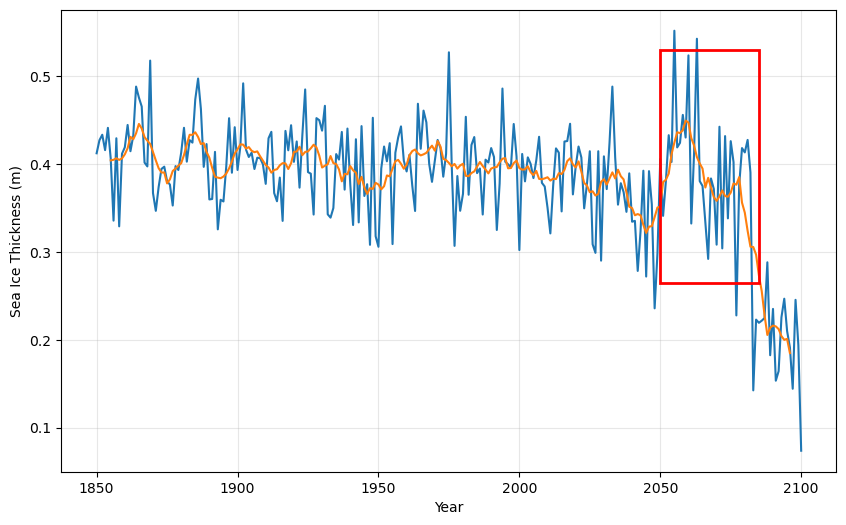

In [21]:
fig, ax=plt.subplots(figsize=(10,6))

april_hi = hi_region[3::12].mean(('nj', 'ni'))
#april_hii = hi_region[2::12].max(('nj', 'ni'))
#may_aice = aice_region[3::12].sum(('nj', 'ni'))

ax.plot(np.arange(1850,2101),april_hi)
#ax.plot(np.arange(1850,2101),may_aice)
ax.plot(np.arange(1850,2101),april_hi.rolling(time=10, center=True).mean())

rect=ax.add_patch(Rectangle((2050, 0.265), 35, 0.265, edgecolor='red',facecolor='none',lw=2))
rect.set_zorder(10)
plt.xlabel('Year')
plt.ylabel('Sea Ice Thickness (m)')
plt.grid(alpha=0.3)
#plt.savefig(path+'/plots/'+'plot2-april-thick.jpg',dpi=300, bbox_inches='tight')
plt.show()

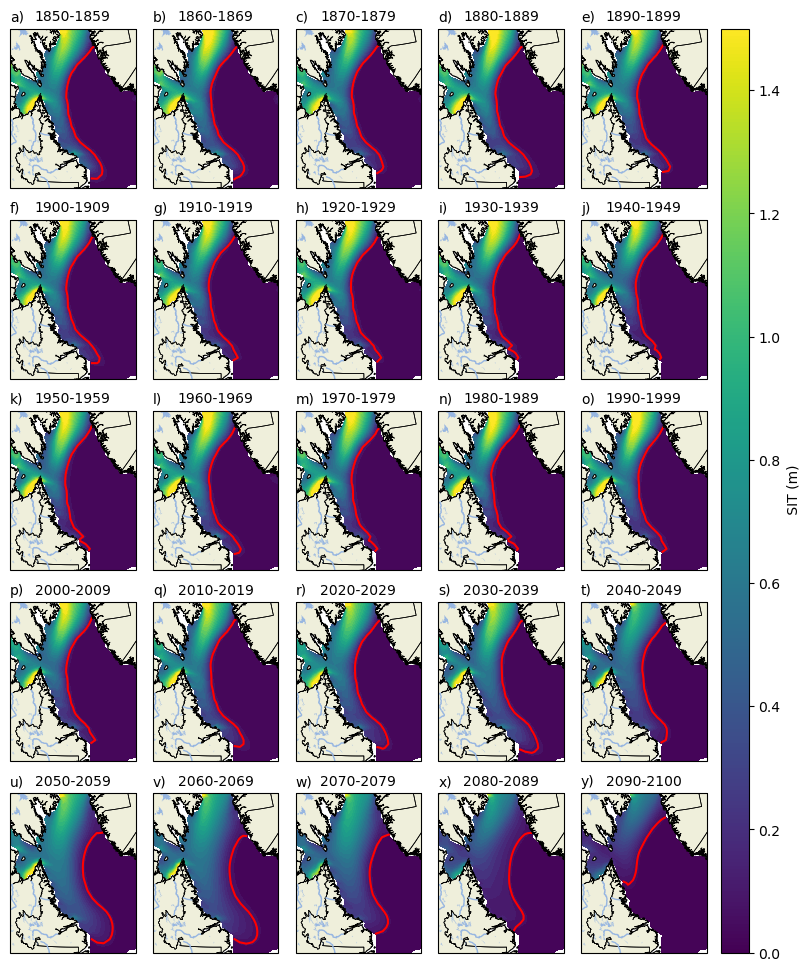

In [25]:
#=========sic_region==max========================

fig = plt.figure(figsize=(10,12))
selected_data = [hi_1850_59, hi_1860_69, hi_1870_79, hi_1880_89, hi_1890_99, hi_1900_09, hi_1910_19,
                 hi_1920_29, hi_1930_39, hi_1940_49, hi_1950_59, hi_1960_69, hi_1970_79, hi_1980_89,
                 hi_1990_99, hi_2000_09, hi_2010_19, hi_2020_29, hi_2030_39, hi_2040_49, hi_2050_59,
                 hi_2060_69, hi_2070_79, hi_2080_89, hi_2090_100]

selected_data1 = [sic_1850_59, sic_1860_69, sic_1870_79, sic_1880_89, sic_1890_99, sic_1900_09, sic_1910_19,
                 sic_1920_29, sic_1930_39, sic_1940_49, sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89,
                 sic_1990_99, sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49, sic_2050_59,
                 sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1850-1859', '1860-1869', '1870-1879', '1880-1889', '1890-1899', '1900-1909', '1910-1919',
          '1920-1929', '1930-1939', '1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989',
          '1990-1999', '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', '2050-2059',
          '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)', 'p)', 'q)',
      'r)', 's)', 't)', 'u)', 'v)', 'w)', 'x)', 'y)']

global_min = np.min([np.nanmin(data.max('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data.max('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(5,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][2::12].mean('time')*100,
                   levels=[15], colors='red',linewidth=3, transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                norm=norm,levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][3::12].mean('time')*100,
                   levels=[15],colors='red',linewidth=3, transform=ccrs.PlateCarree())

    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel(' SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.3)
#plt.tight_layout()
plt.savefig(path+'/plots/'+'plot3-April-thick.jpg',dpi=300, bbox_inches='tight')
plt.show()

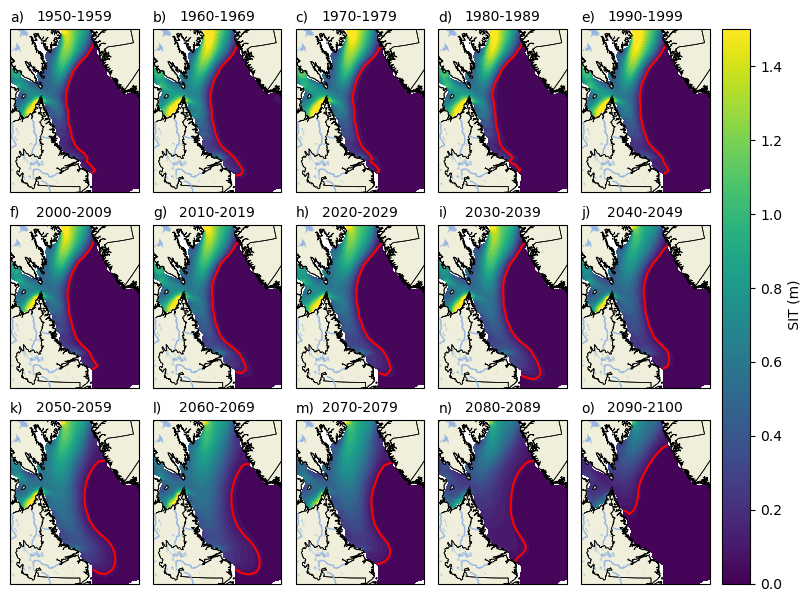

In [31]:
#=========sic_region==max========================

fig = plt.figure(figsize=(10,7.2))
selected_data = [hi_1950_59, hi_1960_69, hi_1970_79, hi_1980_89, hi_1990_99,
                 hi_2000_09, hi_2010_19, hi_2020_29, hi_2030_39, hi_2040_49,
                 hi_2050_59, hi_2060_69, hi_2070_79, hi_2080_89, hi_2090_100]

selected_data1 = [sic_1950_59, sic_1960_69, sic_1970_79, sic_1980_89, sic_1990_99,
                  sic_2000_09, sic_2010_19, sic_2020_29, sic_2030_39, sic_2040_49,
                  sic_2050_59, sic_2060_69, sic_2070_79, sic_2080_89, sic_2090_100]


titles = ['1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999',
          '2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049',
          '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
                 
name=['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)', 'i)', 'j)', 'k)', 'l)', 'm)', 'n)', 'o)']

global_min = np.min([np.nanmin(data.max('time').values) for data in selected_data])
global_max = np.max([np.nanmax(data.max('time').values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67

# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(3,5, i+1, projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                                central_latitude=c_lat,
                                                                standard_parallels=(y0, y1)))
    if i == 0:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][2::12].mean('time'),
                    norm=norm, levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][2::12].mean('time')*100,
                   levels=[15], colors='red',linewidth=3, transform=ccrs.PlateCarree())
    else:
        ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i][3::12].mean('time'),
                norm=norm,levels=45, transform=ccrs.PlateCarree())
        ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i][3::12].mean('time')*100,
                   levels=[15],colors='red',linewidth=3, transform=ccrs.PlateCarree())

    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
                
cbar_ax = fig.add_axes([0.875, 0.11, 0.028, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel(' SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.3)
#plt.tight_layout()
plt.savefig('plot3-April-thick.jpg',dpi=300, bbox_inches='tight')
plt.show()

In [47]:
hi_months=hi_region.sel(time=slice('1990','2019')).groupby('time.month').mean('time')

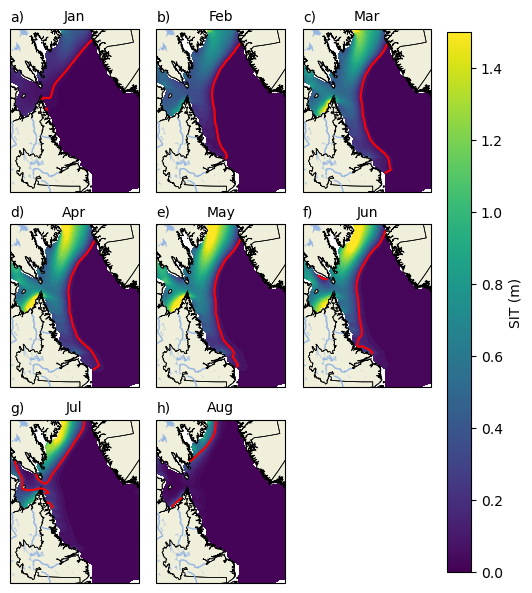

In [56]:
fig = plt.figure(figsize=(6, 7.2))

selected_data= [hi_months[0], hi_months[1], hi_months[2], hi_months[3], hi_months[4], hi_months[5], hi_months[6],hi_months[7]]
selected_data1=[sic_months[0],sic_months[1],sic_months[2],sic_months[3], sic_months[4], sic_months[5],sic_months[6],sic_months[7]]


titles = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug']
name=['a)','b)','c)','d)','e)','f)','g)','h)','i)']

global_min = np.min([np.nanmin(data.values) for data in selected_data])
global_max = np.max([np.nanmax(data.values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67


# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(3,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i], levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i]*100, levels=[15], colors='red',
               linewidth=3, transform=ccrs.PlateCarree())
    
cbar_ax = fig.add_axes([0.89, 0.125, 0.04, 0.75])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
plt.savefig(path+'/plots/'+'plot4-thick1.jpg',dpi=300, bbox_inches='tight')
plt.show()

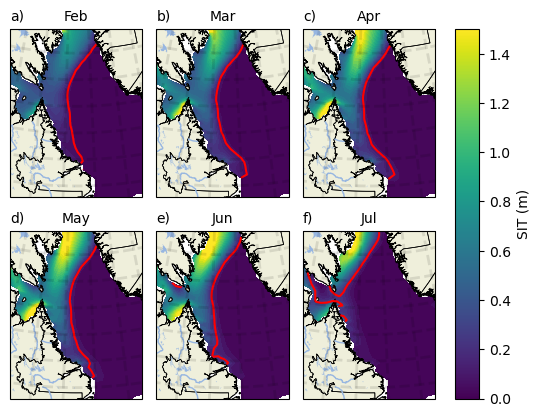

In [54]:
fig = plt.figure(figsize=(6, 4.8))

selected_data= [hi_months[1], hi_months[2], hi_months[3], hi_months[4], hi_months[5], hi_months[6]]
selected_data1= [sic_months[1], sic_months[2], sic_months[3], sic_months[4], sic_months[5],sic_months[6] ]


titles = ['Feb','Mar','Apr','May','Jun','Jul','Aug']
name=['a)','b)','c)','d)','e)','f)','g)','h)',]

global_min = np.min([np.nanmin(data.values) for data in selected_data])
global_max = np.max([np.nanmax(data.values) for data in selected_data])
norm = plt.Normalize(vmin=global_min, vmax=1.5)
cb=cm.ScalarMappable(norm=norm)

x0, x1, y0, y1 =-68,-48,51,67


# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
for i, v in enumerate(selected_data):
    ax = plt.subplot(2,3, i+1,projection=ccrs.AlbersEqualArea(central_longitude=c_lon, 
                                                              central_latitude=c_lat,standard_parallels=(y0, y1)))
    
    ax.set_title(titles[i], fontsize=10)
    ax.coastlines(zorder=2)
    ax.add_feature(cfeature.LAND, zorder=2)
    ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5,  zorder=2)
    ax.add_feature(cfeature.LAKES.with_scale('10m'),  zorder=2)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'),  zorder=2)
    #ax.add_feature(cfeature.BORDERS,  zorder=2)
    
    
    ax.set_extent([x0, x1, y0, y1])
    ax.text(0,1.05,name[i], transform=ax.transAxes, fontsize=10)
    ax.contourf(selected_data[i].TLON, selected_data[i].TLAT, selected_data[i], levels=45, norm=norm,
                   transform=ccrs.PlateCarree(), )
    ax.contour(selected_data1[i].TLON, selected_data1[i].TLAT, selected_data1[i]*100, levels=[15], colors='red',
               linewidth=3, transform=ccrs.PlateCarree())
    
    gl = ax.gridlines(draw_labels=True, linewidth=2, color='black', alpha=0.1, linestyle='--',
                          transform=ccrs.PlateCarree())
    gl.xlabels_bottom, gl.ylabels_left = False, False
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    
cbar_ax = fig.add_axes([0.9, 0.11, 0.04, 0.77])
cbar=fig.colorbar(cb, cax=cbar_ax, ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_ylabel('SIT (m)', fontsize=10)  

plt.subplots_adjust(wspace=-0.15)
plt.savefig(path+'/plots/'+'plot4-thick1.jpg',dpi=300, bbox_inches='tight')
plt.show()